In [3]:
# The Necessary Libraries for EDA and Linear Regression 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


# Step 1: Load Data 

In [4]:
# File path for housing_boston csv
housingfile = 'C:/Users/dgmur/OneDrive/Desktop/ADTA 5340 Discovery and Learning with Big Data/housing boston.csv'


# convert csv into dataframe and removing column names 
df = pd.read_csv(housingfile, header=None)
df.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The file path to retrieve the boston housing csv assigned to the variable, housingfile. Then the csv is converted into a dataframe, and then assigned to df. Lastly, df.head() will output the first 5 rows of df.

# Step 2: Preprocess the Dataset

In [5]:
# list of column names 
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV']

# make list as the column names for df
df.columns = col_names

#View df again
print(df.head())

#check for missing values 
print(df.isna().sum())

#check datatypes of the columns of df  
print(df.info())

#check shape of df
print(df.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

       AA  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -

A list of names are assigned as column headers, then df,head() is used to check the column headers. Next, df.isnull().sum() is implemented to check the total amount of null values per column. To show the information about df, like data types of each column, df.info(),  the number of rows and columns of df is checked by using the df.shape function.


# Step 3: EDA

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.077434    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.267574    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO          AA  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.043570    7.823009  377.442478   18.247124  369.826504   
std     28.127025    2.0904

<Axes: >

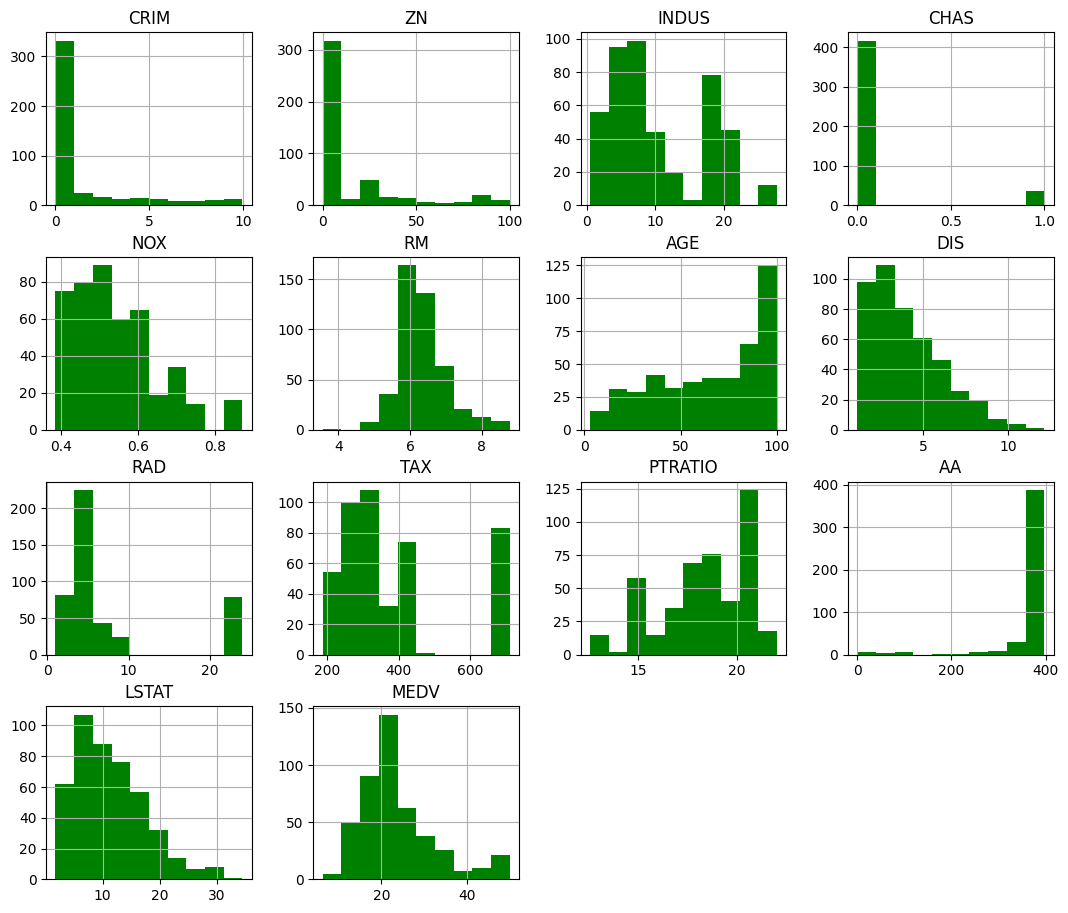

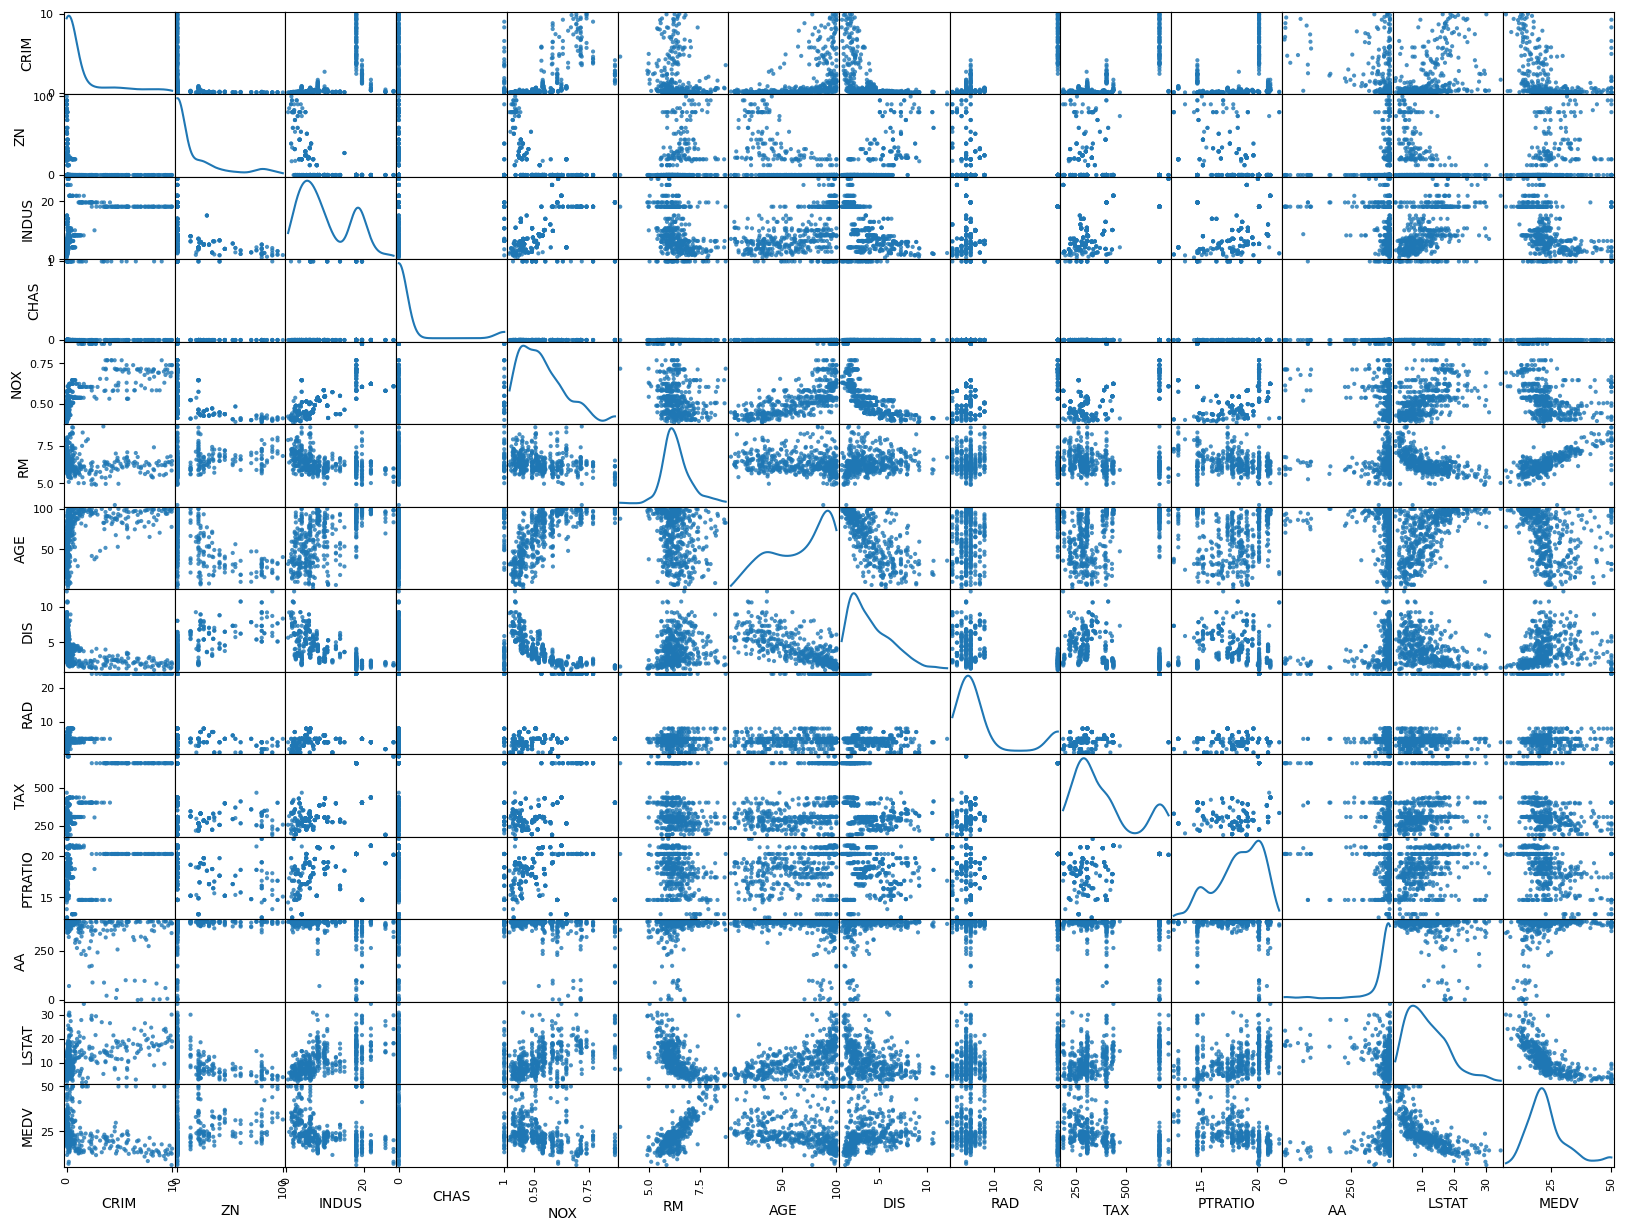

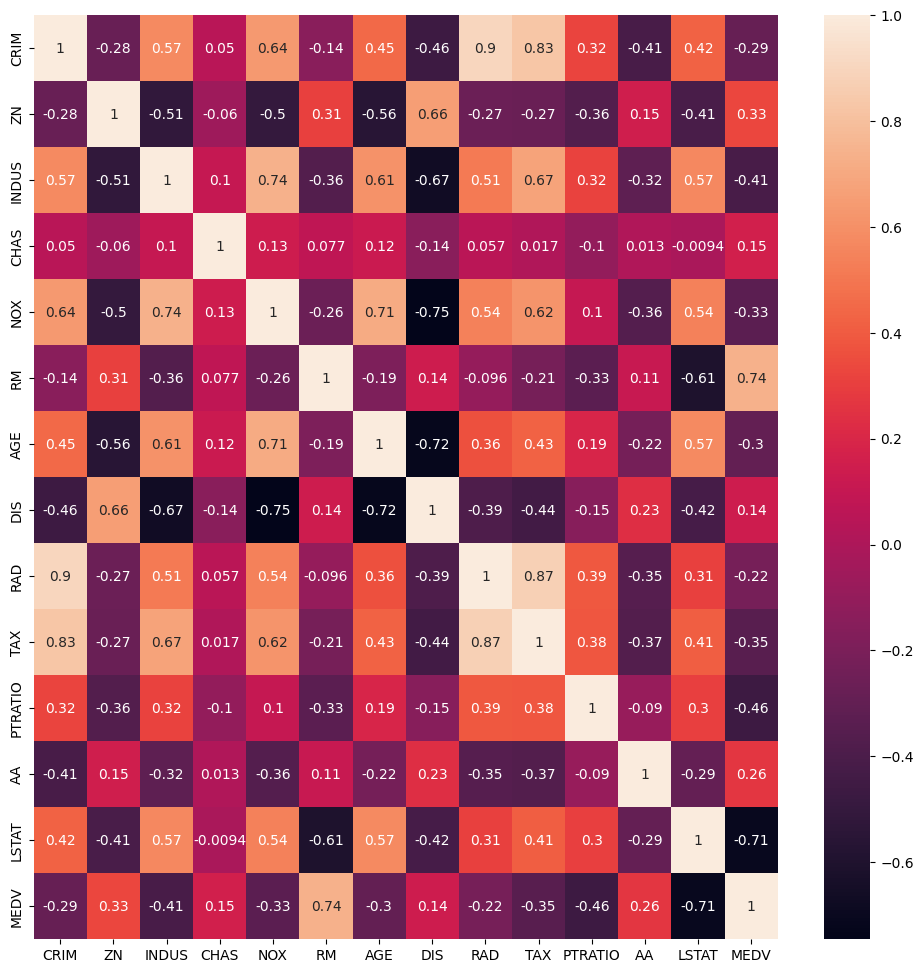

In [6]:
# outputs the summary statistics of df
print(df.describe())

# Creates a histogram for numerical variables 
df.hist(figsize = (13,11), color = 'green')
#Creates a scatterplot matrix with kde plots as the diagonal 
from pandas.plotting import scatter_matrix
scatter_matrix(df, diagonal = 'kde', figsize= (20,15), alpha= 0.8)
#Creates a correlation heatmap
df_corr = df.corr()
fig, ax = plt.subplots(figsize = (12,12))

sns.heatmap(df_corr, annot= True, ax = ax) 




 This block of code consists of EDA. First the summary statistics of df which has the count, mean, minimum, standard deviation, 25% quartile value, median, 75% quartile and the maximum is outputted, this is done by using  df.describe. Next 3 plots were implemented for data visualization, 1 plot for univariate, and 2 plots for multivariate. For the univariate visualization, a plot that displayed 9 histograms for all 9 of the numerical variables, this was done using the df.hist(). For the multivariate visualizations, a scatter matrix with kde plots as the diagonal was implemented by using the scatter_matrix() function , along with a correlation heatmap  which is done by using the sns.heatmap(). 



## Step 4: Separate Dataset into Input and Output NumPy Arrays 

In [7]:
#Subset df 
df2 = df[['CRIM', 'RM', 'DIS', 'RAD','AA', 'MEDV' ]]

# convert values of into NumPy Array
array = df2.values

#inputs/features 
X = array[:,0:5]

#Response/target variable 
Y = array[:,5]




A subset of df is created called df2, this consists of the columns: CRIM, RM,’DIS’, ‘ RAD’, ‘AA’ ‘MEDV’. These were selected based off the variables that had the highest positive correlation to MEDV. Then this df2 is converted into an array, and assigned the variable, array. The variable, array is sliced to only include all the rows of the column index 0 to,but not including 6, these will be predictor variables, and are assigned to the variable X. For the response variable, array is sliced to only include all of the rows of the column index 6, this is assigned to Y. 


# Step 5: Split input/output arrays into testing and training dataset

In [8]:
# establish seed number for replicability 
seed = 7 

#split data into test/train subset, 70/30 split
x_train, x_test , y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=seed)

 For this code block, the X and Y will be split into a train/test split where the train had 70% of the data, and the test had 30% of the data.  The seed variable was assigned to a value 7, this was meant for replicability purposes. To conduct a train, test split in python, the train_test_split() is used where the random state is equal to seed. X_train and Y_train will represent the training subset, and X_test and Y_test will represent the testing subset. 

# Step 6: Build and train model 

In [9]:
# call linear regression function 
model = LinearRegression()

#fit the linear regression with training 
model.fit(x_train, y_train)

# Intercept = 18.58
print("Intercept {:.2f}".format(model.intercept_))

#names of features
coef_names = ['CRIM', 'RM', 'DIS', 'RAD','AA']

zip_coef = zip(coef_names, model.coef_)
#convert iterator into set
coeffs = set(zip_coef)

#print coefficients with corresponding name of feature
for c in coeffs: 
    print(c, "\n")




Intercept -37.52
('RM', 9.117793079225383) 

('RAD', 0.11232013291374043) 

('DIS', -0.2707142549955877) 

('AA', 0.013402116847956336) 

('CRIM', -1.0363276216508543) 



LinearRegression(), which is used to conduct linear regression, is assigned to the variable model. Then x_train and y_train are used to fit the linear regression model using model.fit(). Then using model.intercept_, the intercept of the regression model is outputted. Lastly, the predictor variable name with it’s coefficient is outputted. does this paragraph explain the execution of the block of code The predictor variables are presented in a list in string format and then assigned to coef_names. Then using the zip() function names_2 and model.coef_ will aggregate together which is assigned to zip_coeff. Then zip_coeff is converted into a set using set() function and then assigned to the variable, coeffs. Lastly, a for loop that iterates through coeffs using c after each element in coeff is printed, then the python cursor skips to the next line. 


# Step 7: Calculate R-square

In [10]:
r_squared = model_score = model.score(x_test, y_test)
#print out r^2 score
print("r_squared:", r_squared)

r_squared: 0.5239565409276702


To calculate the r^2 of the model, x_test and y_test are used with the function model.score. The output is assigned to the variable, r_squared. Then r_squared is printed. 

# Step 8: Predict Median value

In [11]:
# 1st prediction 

one_pred = model.predict([[1.4,6.34,4,8,370]])
print("1st prediction:", one_pred)
# 2nd prediction 
two_pred = model.predict([[.19, 6.2, 3.5, 5, 392]])
print("2nd prediction: ", two_pred )


1st prediction: [23.61501642]
2nd prediction:  [23.68572511]

k-fold cross validation method: 

	 Average of all results from the k-fold Cross-Validation using explained variance: 0.5476646176962496


This code block is used to predict the response variable based on the values of the predictor variables. This is done by using the model.score() and implementing a nested list of the values of the predictor variables.I chose the variables, CRIM, RM, DIS, RAD, and AA as the predictor variables, I made this decision based on the top 5 variables that were positively correlated with MEDV. I decided to make 2 predictions to predict the value of MEDV. For the first one, I did CRIM = 1.4, RM = 6.34, DIS = 4, RAD = 8, AA = 370, for the 2nd prediction I did CRIM = .19, RM = 6.2, DIS = 3.5 , RAD = 5, AA = 392. 


# Step 9: KFold Cross Validation 

In [ ]:

#10 fold Cross validation 
print()
print("k-fold cross validation method: ")
from sklearn.model_selection import KFold, cross_val_score
#specify number of k:
num_fold = 10 

#use the same random seed for replicability 
seed = 7 

#split data using kfold 
k = KFold(n_splits = num_fold, random_state=seed, shuffle = True)

#Using explained variance for scoring 
scoring = 'explained_variance'

#Train model and run k-fold cross validation to validate the model 
results = cross_val_score(model, X,Y, cv = k , scoring = scoring)

#Output evaluation results 
#Will output the average of all the results from k-fold cross validation 
print()
print("\t Average of all results from the k-fold Cross-Validation using explained variance:", results.mean())

num_fold is assigned a value of 10, seed is assigned the value 7 for replicability. Then, inside the Kfold() function is the n_splits set to num_fold, the random_state parameter specified to seed and shuffle specified to true, which will shuffle to dataset every time it splits during cross validation. Then this is assigned to the variable k. This initiates the cross validation. Next, scoring is assigned the string, "accuracy". Next inside the cross_val_score() function is model, X,Y, followed by cv equalling to the k variable and the scoring parameter equalling the scoring variable. The cross_val_score() function will use the Linear regression model and X and Y to compute the performance using the explained variance method. This will be assigned to results. Then the mean of results is printed.